In [1]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# print tensorflow version
print(tf.__version__)

2.3.0


In [3]:
# download dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip


--2020-10-05 17:01:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.30MB/s    in 79s     

2020-10-05 17:02:55 (3.89 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [8]:
!pip install split_folders

In [10]:
import splitfolders

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'rps/rockpaperscissors/data', seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4217.45 files/s]


In [11]:
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

In [12]:
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
  shear_range=0.2, #to apply some random tranfromations
  zoom_range=0.2, #to apply zoom
  horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
  rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
  shear_range=0.2, #to apply some random tranfromations
  zoom_range=0.2, #to apply zoom
  horizontal_flip=True) 

[Tutorial Image Classification With Keras flow_from_directory and generators](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

In [14]:
train_generator = train_datagen.flow_from_directory(
  train_dir, # set to the path where your ‘n’ classes of folders are present.
  target_size=(224, 224),# size of your input images, every image will be resized to this size.
  batch_size=32, # No. of images to be yielded from the generator per batch.
  color_mode='rgb', # if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
  class_mode='categorical', # Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”
  shuffle = True, # Set True if you want to shuffle the order of the image that is being yielded, else set False
  seed=42) # Random seed for applying random image augmentation and shuffling the order of the image.
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


Visualize training & Validation images

In [15]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [16]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

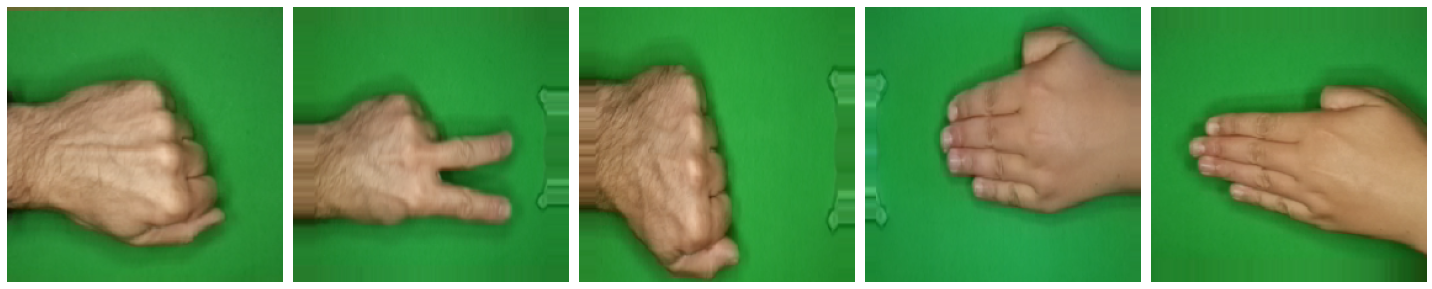

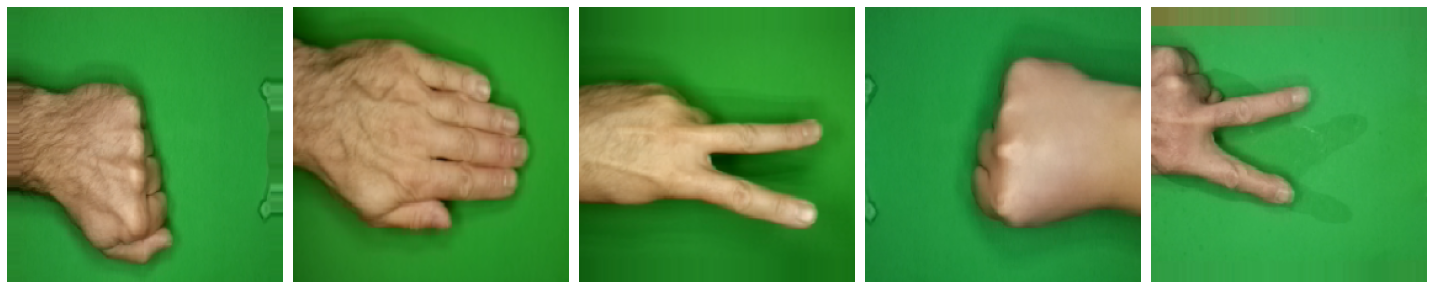

In [19]:
import matplotlib.pyplot as plt

plotImages(sample_train_images[:5])
plotImages(sample_val_images[:5])

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
historrry = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=20, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/20
25/25 [==============================] - 12s 488ms/step - loss: 1.0919 - accuracy: 0.4238 - val_loss: 0.8454 - val_accuracy: 0.7625
Epoch 2/20
25/25 [==============================] - 12s 481ms/step - loss: 0.5917 - accuracy: 0.7775 - val_loss: 0.3689 - val_accuracy: 0.8687
Epoch 3/20
25/25 [==============================] - 12s 484ms/step - loss: 0.3230 - accuracy: 0.8948 - val_loss: 0.3129 - val_accuracy: 0.9000
Epoch 4/20
25/25 [==============================] - 12s 479ms/step - loss: 0.2697 - accuracy: 0.9087 - val_loss: 0.1651 - val_accuracy: 0.9563
Epoch 5/20
25/25 [==============================] - 12s 479ms/step - loss: 0.1960 - accuracy: 0.9350 - val_loss: 0.1497 - val_accuracy: 0.9500
Epoch 6/20
25/25 [==============================] - 12s 473ms/step - loss: 0.2065 - accuracy: 0.9278 - val_loss: 0.2075 - val_accuracy: 0.9312
Epoch 7/20
25/25 [==============================] - 12s 474ms/step - loss: 0.1878 - accuracy: 0.9278 - val_loss: 0.2775 - val_accuracy: 0.9187

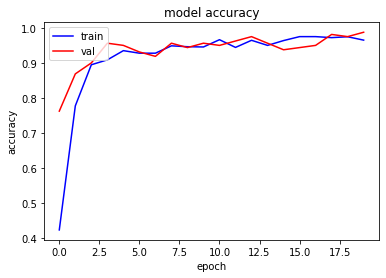

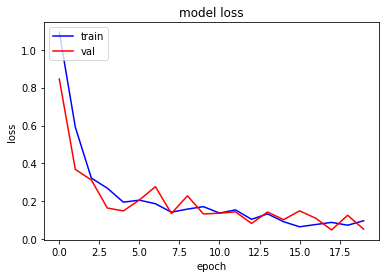

In [24]:
import matplotlib.pyplot as plt

acc = historrry.history['accuracy']
val_acc = historrry.history['val_accuracy']

loss = historrry.history['loss']
val_loss = historrry.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ (1).png
PAPER


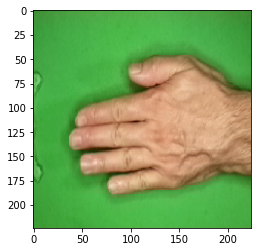

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')

# Menggunakan Dropout

[Berdasarkan pada tutorial image classification dropout tenser flow.](https://www.tensorflow.org/tutorials/images/classification#dropout)

In [29]:
model_new = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
history = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=20, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/20
25/25 [==============================] - 13s 506ms/step - loss: 0.1040 - accuracy: 0.9663 - val_loss: 0.2503 - val_accuracy: 0.8938
Epoch 2/20
25/25 [==============================] - 12s 482ms/step - loss: 0.1000 - accuracy: 0.9725 - val_loss: 0.0851 - val_accuracy: 0.9688
Epoch 3/20
25/25 [==============================] - 12s 493ms/step - loss: 0.0599 - accuracy: 0.9737 - val_loss: 0.1132 - val_accuracy: 0.9625
Epoch 4/20
25/25 [==============================] - 12s 482ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0628 - val_accuracy: 0.9688
Epoch 5/20
25/25 [==============================] - 12s 473ms/step - loss: 0.0853 - accuracy: 0.9734 - val_loss: 0.0780 - val_accuracy: 0.9688
Epoch 6/20
25/25 [==============================] - 12s 474ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0657 - val_accuracy: 0.9750
Epoch 7/20
25/25 [==============================] - 12s 481ms/step - loss: 0.0662 - accuracy: 0.9772 - val_loss: 0.1125 - val_accuracy: 0.9563

https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


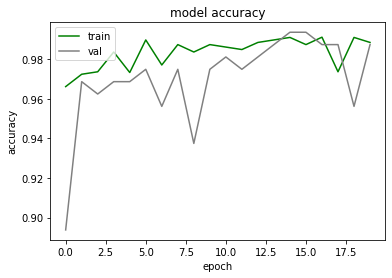

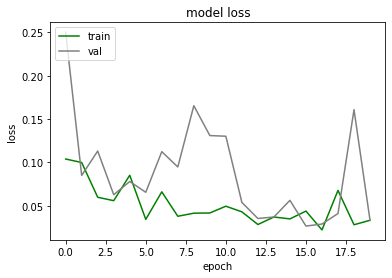

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='green')
plt.plot(val_acc, color='grey')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='grey')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()